In [12]:
# import Python packages
import biom
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.stats import mannwhitneyu
import seaborn as sns
from skbio.stats.distance import permanova
from skbio.stats.ordination import OrdinationResults
from skbio import DistanceMatrix
from numpy import array
from numpy.random import RandomState
from skbio.diversity import alpha_diversity

In [13]:
# read in biom table
biom_tbl = biom.load_table('../tables/tables_rs210/per_genome/Species-gOTU_collapsed.biom')
biom_df = biom_tbl.to_dataframe().T 
biom_df

,s__Abiotrophia defectiva_G000160075,s__Abiotrophia defectiva_G013267415,s__Acidovorax temperans_G006716905,s__Acinetobacter baumannii_G000162295,s__Acinetobacter baumannii_G000369385,s__Acinetobacter baumannii_G000737145,s__Acinetobacter baumannii_G002811175,s__Acinetobacter baumannii_G008632635,s__Acinetobacter baumannii_G009035845,s__Acinetobacter baumannii_G009759685,...,s__Veillonella rogosae_G002959775,s__Veillonella tobetsuensis_G001078375,s__Veillonella tobetsuensis_G002959935,s__Xanthomonas campestris_G000007145,s__Xanthomonas campestris_G013388375,s__Xanthomonas campestris_G020731405,s__Xanthomonas campestris_G020813135,s__[Curtobacterium] plantarum_G003710245,s__[Pseudomonas] hibiscicola_G000382065,s__[Pseudopropionibacterium] massiliense_G900607225
15443.209.S78.L005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15443.136.S29.L005,16.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0
15443.167.S39.L005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15443.160.S33.L005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15443.192.S61.L005,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15443.212.S81.L005,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0
15443.213.S82.L005,30.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,2.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0
15443.79.S6.L005,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
15443.81.S7.L005,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Function to transform index value
def transform_index_value(idx):
    parts = idx.split('.')
    # Check if there are enough parts to avoid IndexError
    if len(parts) > 2:
        return parts[1]  # Return the part between the first and second period
    else:
        return idx  # Return the original index value if not enough parts

# Apply the transformation to the index
biom_df.index = biom_df.index.map(transform_index_value)
biom_df

,s__Abiotrophia defectiva_G000160075,s__Abiotrophia defectiva_G013267415,s__Acidovorax temperans_G006716905,s__Acinetobacter baumannii_G000162295,s__Acinetobacter baumannii_G000369385,s__Acinetobacter baumannii_G000737145,s__Acinetobacter baumannii_G002811175,s__Acinetobacter baumannii_G008632635,s__Acinetobacter baumannii_G009035845,s__Acinetobacter baumannii_G009759685,...,s__Veillonella rogosae_G002959775,s__Veillonella tobetsuensis_G001078375,s__Veillonella tobetsuensis_G002959935,s__Xanthomonas campestris_G000007145,s__Xanthomonas campestris_G013388375,s__Xanthomonas campestris_G020731405,s__Xanthomonas campestris_G020813135,s__[Curtobacterium] plantarum_G003710245,s__[Pseudomonas] hibiscicola_G000382065,s__[Pseudopropionibacterium] massiliense_G900607225
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,16.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0
213,30.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,2.0,3.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0
79,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
81,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Read in metadata
metadata_path = '../metadata/metadata.csv'
md = pd.read_csv(metadata_path)
md['sample_ID'] = md['sample_ID'].astype(str)
md.head()

,patient_number,sample_ID,subject_ID,microbiome_type,body_site,AD_status,les_or_nonles,age_months,age_years,sex,skin_group,sample_group,AD_severity
0,1,72,1,skin,forehead,Normal,NL,5,0,M,Normal,skin-normal,NaN
1,1,73,1,skin,nose,Normal,NL,5,0,M,Normal,skin-normal,NaN
2,1,75,1,skin,knee,Normal,NL,5,0,M,Normal,skin-normal,NaN
3,2,76,2,skin,elbow,Normal,NL,2,0,F,Normal,skin-normal,NaN
4,2,78,2,skin,forehead,Normal,NL,2,0,F,Normal,skin-normal,NaN


In [16]:
# Keep only skin samples
skin_md = md[md['microbiome_type'] == 'skin']
skin_sample_ids = skin_md['sample_ID'].values
biom_df_filtered = biom_df.loc[biom_df.index.isin(skin_sample_ids)]
biom_df_filtered.head()

,s__Abiotrophia defectiva_G000160075,s__Abiotrophia defectiva_G013267415,s__Acidovorax temperans_G006716905,s__Acinetobacter baumannii_G000162295,s__Acinetobacter baumannii_G000369385,s__Acinetobacter baumannii_G000737145,s__Acinetobacter baumannii_G002811175,s__Acinetobacter baumannii_G008632635,s__Acinetobacter baumannii_G009035845,s__Acinetobacter baumannii_G009759685,...,s__Veillonella rogosae_G002959775,s__Veillonella tobetsuensis_G001078375,s__Veillonella tobetsuensis_G002959935,s__Xanthomonas campestris_G000007145,s__Xanthomonas campestris_G013388375,s__Xanthomonas campestris_G020731405,s__Xanthomonas campestris_G020813135,s__[Curtobacterium] plantarum_G003710245,s__[Pseudomonas] hibiscicola_G000382065,s__[Pseudopropionibacterium] massiliense_G900607225
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,16.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,7.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Calculate Shannon diversity for each sample
shannon_diversity = alpha_diversity(metric='shannon', counts=biom_df_filtered.values, ids=biom_df_filtered.index)

shannon_diversity

/Users/yac027/mambaforge3/envs/microbiome_plots/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:869: RuntimeWarning: invalid value encountered in divide
  freqs = counts / counts.sum()


209    5.667296
136    7.483809
167    5.159972
160    3.454442
192    4.551895
         ...   
185    6.556366
212    6.344985
79     6.731607
81     6.611513
75     6.735278
Length: 79, dtype: float64

In [18]:
shannon_df = shannon_diversity.to_frame(name='Alpha-div')
shannon_df = shannon_df.dropna(subset=['Alpha-div'])
shannon_df

,Alpha-div
209,5.667296
136,7.483809
167,5.159972
160,3.454442
192,4.551895
...,...
185,6.556366
212,6.344985
79,6.731607
81,6.611513


In [19]:
# Ensure md is indexed by 'sample_ID' for efficient lookup
md_indexed = md.set_index('sample_ID')

# Add a new column to shannon_df by looking up the index in md_indexed
shannon_df['sample_type'] = shannon_df.index.to_series().apply(lambda x: md_indexed.loc[x, 'sample_group'] if x in md_indexed.index else None)
shannon_df

,Alpha-div,sample_type
209,5.667296,skin-normal
136,7.483809,skin-AD-NL
167,5.159972,skin-AD-L
160,3.454442,skin-AD-NL
192,4.551895,skin-AD-NL
...,...,...
185,6.556366,skin-AD-NL
212,6.344985,skin-normal
79,6.731607,skin-normal
81,6.611513,skin-normal


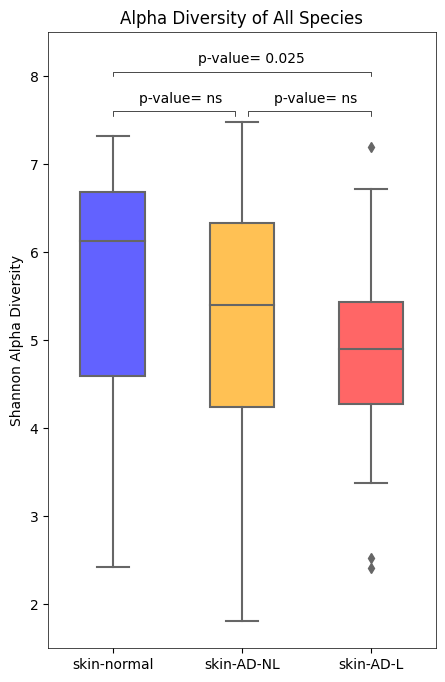

In [20]:
# Create the boxplot
plt.figure(figsize=(5, 8))

# colors = ["#0000ff", "#ffa406", "#ff0000"]
colors = ["#6262ff", "#ffc154", "#ff6666"]
# Create the boxplot with custom colors and make it slightly translucent with `saturation`
ax = sns.boxplot(x='sample_type', y='Alpha-div', data=shannon_df, palette=colors, width=0.5, saturation=1)

# Overlay the individual data points using stripplot
# Set the title and labels for clarity
plt.title('Alpha Diversity of All Species', fontsize=12)
plt.ylabel('Shannon Alpha Diversity', fontsize=10)
plt.xlabel(None)
# Improve layout for readability
plt.xticks()  # Rotate the x labels for better legibility if needed

# Remove horizontal grid lines
plt.gca().yaxis.grid(False) # Use plt.gca() to get the current Axes instance and then disable the y-axis grid

# Show significance
plt.plot([0, 0, 2, 2], [8.0, 8.05, 8.05, 8.0], linewidth=0.5, color='k')
ax.text(0.66, 8.15, 'p-value= 0.025', fontsize=10)

plt.plot([0, 0, 0.95, 0.95], [7.55, 7.6, 7.6, 7.55], linewidth=0.5, color='k')
ax.text(0.2, 7.7, 'p-value= ns', fontsize=10)

plt.plot([1.05, 1.05, 2, 2], [7.55, 7.6, 7.6, 7.55], linewidth=0.5, color='k')
ax.text(1.25, 7.7, 'p-value= ns', fontsize=10)

# Set spines to black
for spine in ax.spines.values():
    spine.set_color('black'),
    spine.set_linewidth(0.5)

# Set the y-axis upper limit
plt.ylim(plt.ylim()[0], 8.5)

plt.savefig('../plots/diversity_plots/alpha_div_all-species.png', dpi=600)
plt.show()

In [21]:
# Define the groups
groups = shannon_df['sample_type'].unique()

# Perform Mann-Whitney U test for each pairwise group
results = []
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = shannon_df[shannon_df['sample_type'] == groups[i]]['Alpha-div']
        group2 = shannon_df[shannon_df['sample_type'] == groups[j]]['Alpha-div']
        
        # Perform the test
        stat, p = mannwhitneyu(group1, group2)
        results.append(((groups[i], groups[j]), stat, p))

# Print the results
for result in results:
    print(f"Comparison between {result[0][0]} and {result[0][1]}: U-statistic = {result[1]}, p-value = {result[2]}")

Comparison between skin-normal and skin-AD-NL: U-statistic = 457.0, p-value = 0.15155558572371391
Comparison between skin-normal and skin-AD-L: U-statistic = 465.0, p-value = 0.025793951555072917
Comparison between skin-AD-NL and skin-AD-L: U-statistic = 298.0, p-value = 0.4613266085293738


In [22]:
for group in groups:
    print(f"{group}: {len(shannon_df[shannon_df['sample_type'] == group])} samples")


skin-normal: 31 samples
skin-AD-NL: 24 samples
skin-AD-L: 22 samples
